In [1]:
import numpy as np
import os
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

def is_floatable(valIn):
    try: 
        float(valIn)
        return True
    except:
        return False

def ccOrL(StringIn):
    splitString = []
    splitString = StringIn.split()
    if splitString[1] == "g/L":
        return float(splitString[0])/1000
    else:
        return float(splitString[0])

In [2]:
#url = 'https://physics.nist.gov/PhysRefData/XrayMassCoef/ElemTab/z13.html'
#page = requests.get(url).content
#soup = BeautifulSoup(page,"lxml")
#table = soup.find('table', {'cellpadding':"1"})
##print(table)
#dataTable = []
#for row in table.find_all("tr")[1:]:
#    tempList = []
#    tempList = [cell.get_text(strip=True) for cell in row.find_all("td")]
#    tempList = [var for var in tempList if is_floatable(var) == True]
#    dataTable.append(tempList)
#dataTable = [x for x in dataTable if x != []]
#dataTable = [[float(y)for y in x] for x in dataTable]
#EnergyArray = np.array([row[0] for row in dataTable])
#CoeffArray = np.array([row[1] for row in dataTable])
#print(dataTable)
#print(EnergyArray)
#print(CoeffArray)


In [3]:
MassAttenDict = {}
for i in range(92):
    z = i+1
    url = 'https://physics.nist.gov/PhysRefData/XrayMassCoef/ElemTab/z{val:02.0f}.html'.format(val = z)
    page = requests.get(url).content
    soup = BeautifulSoup(page,"lxml")
    table = soup.find('table', {'cellpadding':"1"})
    #print(table)
    dataTable = []
    for row in table.find_all("tr")[1:]:
        tempList = []
        tempList = [cell.get_text(strip=True) for cell in row.find_all("td")]
        tempList = [var for var in tempList if is_floatable(var) == True]
        dataTable.append(tempList)
    dataTable = [x for x in dataTable if x != []]
    dataTable = [[float(y) for y in x] for x in dataTable]
    MassAttenDict[z] = {
        'EnergyArray' : np.array([row[0] for row in dataTable])*1000,
        'CoeffArray' : np.array([row[1] for row in dataTable])
    }


In [4]:
url = 'https://www.angstromsciences.com/density-elements-chart'
page = requests.get(url).content
soup = BeautifulSoup(page,"lxml")
table = soup.find('table', {'class':"referenceTable"})
#print(table)
DensityDict = {}
for row in table.find_all("tr")[1:]:
    tempList = []
    tempList = [cell.get_text(strip=True) for cell in row.find_all("td")]
    DensityDict[int(tempList[3])] = ccOrL(tempList[0]) 
DensityDict[85] = 8.95
DensityDict[87] = 2.48
DensityDict = dict(sorted(DensityDict.items()))
print(DensityDict)

{1: 8.989999999999999e-05, 2: 0.0001785, 3: 0.534, 4: 1.848, 5: 2.34, 6: 2.26, 7: 0.0012506, 8: 0.0014290000000000001, 9: 0.001696, 10: 0.0009, 11: 0.971, 12: 1.738, 13: 2.702, 14: 2.33, 15: 1.82, 16: 2.07, 17: 0.003214, 18: 0.0017824, 19: 0.862, 20: 1.55, 21: 2.99, 22: 4.54, 23: 6.11, 24: 7.19, 25: 7.43, 26: 7.874, 27: 8.9, 28: 8.9, 29: 8.96, 30: 7.13, 31: 5.907, 32: 5.323, 33: 5.72, 34: 4.79, 35: 3.119, 36: 0.00375, 37: 1.63, 38: 2.54, 39: 4.47, 40: 6.51, 41: 8.57, 42: 10.22, 43: 11.5, 44: 12.37, 45: 12.41, 46: 12.02, 47: 10.5, 48: 8.65, 49: 7.31, 50: 7.31, 51: 6.684, 52: 6.24, 53: 4.93, 54: 0.005900000000000001, 55: 1.873, 56: 3.59, 57: 6.15, 58: 6.77, 59: 6.77, 60: 7.01, 61: 7.3, 62: 7.52, 63: 5.24, 64: 7.895, 65: 8.23, 66: 8.55, 67: 8.8, 68: 9.07, 69: 9.32, 70: 6.9, 71: 9.84, 72: 13.31, 73: 16.65, 74: 19.35, 75: 21.04, 76: 22.6, 77: 22.4, 78: 21.45, 79: 19.32, 80: 13.546, 81: 11.85, 82: 11.35, 83: 9.75, 84: 9.3, 85: 8.95, 86: 0.00973, 87: 2.48, 88: 5.5, 89: 10.07, 90: 11.724, 91: 

In [5]:
ValidElements = []
for i in range(92):
    z = i+1
    MassAttenDict[z]['PenPercent'] = 100*np.exp(-0.25*MassAttenDict[z]['CoeffArray']*DensityDict[z])
    ValidElements.append(str(MassAttenDict[z]['PenPercent'][MassAttenDict[z]['EnergyArray'].tolist().index(30)]<1)+ " {ele}".format(ele = z))
print(ValidElements)
    

['False 1', 'False 2', 'False 3', 'False 4', 'False 5', 'False 6', 'False 7', 'False 8', 'False 9', 'False 10', 'False 11', 'False 12', 'False 13', 'False 14', 'False 15', 'False 16', 'False 17', 'False 18', 'False 19', 'False 20', 'False 21', 'True 22', 'True 23', 'True 24', 'True 25', 'True 26', 'True 27', 'True 28', 'True 29', 'True 30', 'True 31', 'True 32', 'True 33', 'True 34', 'True 35', 'False 36', 'True 37', 'True 38', 'True 39', 'True 40', 'True 41', 'True 42', 'True 43', 'True 44', 'True 45', 'True 46', 'True 47', 'True 48', 'True 49', 'True 50', 'True 51', 'True 52', 'True 53', 'False 54', 'False 55', 'True 56', 'True 57', 'True 58', 'True 59', 'True 60', 'True 61', 'True 62', 'True 63', 'True 64', 'True 65', 'True 66', 'True 67', 'True 68', 'True 69', 'True 70', 'True 71', 'True 72', 'True 73', 'True 74', 'True 75', 'True 76', 'True 77', 'True 78', 'True 79', 'True 80', 'True 81', 'True 82', 'True 83', 'True 84', 'True 85', 'False 86', 'True 87', 'True 88', 'True 89', 'Tru

In [6]:
ElementOfInt = 29
EnergyOfInt = 50
IndexOfEng = MassAttenDict[ElementOfInt]['EnergyArray'].tolist().index(EnergyOfInt)
print(
    MassAttenDict[ElementOfInt]['EnergyArray'][IndexOfEng],
    MassAttenDict[ElementOfInt]['PenPercent'][IndexOfEng]
    )

50.0 0.2870927875193824


In [7]:
#EnergyRange = range(int(MassAttenDict[1]['EnergyArray'].tolist().index(2)),int(MassAttenDict[1]['EnergyArray'].tolist().index(60)))
#mask = (2 < MassAttenDict[29]['EnergyArray']) * (MassAttenDict[29]['EnergyArray'] < 60)
#MassAttenDict[29]['PenPercent'][mask]

ElementOfInt = 78
EnergyOfInt = 60
ThicknessOfInt = 0.05
UpperBound = 40
LowerBound = 5


ValidRangeList = []
ValidElements = []

for i in range(92):
    z = i+1
    MassAttenDict[z]['PenPercent'] = 100*np.exp(-ThicknessOfInt*MassAttenDict[z]['CoeffArray']*DensityDict[z])
    ValidElements.append(str(MassAttenDict[z]['PenPercent'][MassAttenDict[z]['EnergyArray'].tolist().index(30)]<1)+ " {ele}".format(ele = z))
#print(ValidElements)


for i in range(92):
    z = i+1
    mask = (LowerBound < MassAttenDict[z]['EnergyArray']) * (MassAttenDict[z]['EnergyArray'] < UpperBound)
    if np.all(MassAttenDict[z]['PenPercent'][mask] <= 0.1) == True :
        ValidRangeList.append(z)
    else:
        pass
mask = (LowerBound < MassAttenDict[ElementOfInt]['EnergyArray']) * (MassAttenDict[ElementOfInt]['EnergyArray'] < UpperBound)
print(ValidRangeList)
print(MassAttenDict[ElementOfInt]['PenPercent'][mask])
#IndexOfEng = MassAttenDict[ElementOfInt]['EnergyArray'].tolist().index(EnergyOfInt)
#print(
#    MassAttenDict[ElementOfInt]['EnergyArray'][IndexOfEng],
#    MassAttenDict[ElementOfInt]['PenPercent'][IndexOfEng]
#    )

[43, 44, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 90, 91, 92]
[6.63263898e-189 2.81415953e-091 1.87762922e-051 2.91173301e-035
 2.28586261e-089 4.33173029e-074 1.46610740e-061 4.90695257e-085
 8.38884704e-085 2.51717503e-076 3.33812199e-088 3.16071062e-072
 5.26938337e-034 4.99721726e-011]


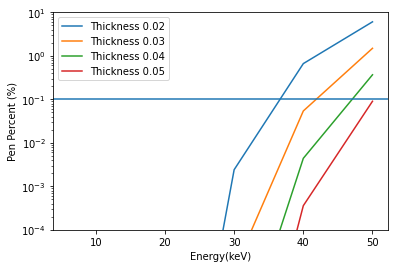

In [11]:
for i in ThicknessList:
  z = 79
  MassAttenDict[z]['PenPercent'] = 100*np.exp(-i*MassAttenDict[z]['CoeffArray']*DensityDict[z])
  mask = (5 < MassAttenDict[z]['EnergyArray']) * (MassAttenDict[z]['EnergyArray'] < 60)
  plt.plot(MassAttenDict[z]['EnergyArray'][mask], MassAttenDict[z]['PenPercent'][mask], label = "Thickness {val}".format(val = i))

plt.xlabel("Energy(keV)")
plt.ylabel("Pen Percent (%)")
plt.yscale('log')
plt.ylim(1e-4, 1e1)
plt.axhline(0.1)
plt.legend()

Text(0.5, 1.0, 'Penetration Percent (%)')

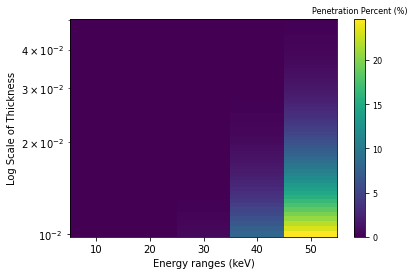

In [50]:
z=79 #change to select element of interest
mask = (5 < MassAttenDict[z]['EnergyArray']) * (MassAttenDict[z]['EnergyArray'] < 60)
PenPlotMatrix = np.array([100*np.exp(-i*MassAttenDict[z]['CoeffArray'][mask]*DensityDict[z]) for i in np.linspace(0.05,0.01 ,100)])
fig , ax = plt.subplots()
fuck = ax.pcolormesh(MassAttenDict[z]['EnergyArray'][mask],np.linspace(0.05, 0.01,100), PenPlotMatrix,shading='auto')
plt.yscale('log')
plt.ylabel('Log Scale of Thickness')
plt.xlabel('Energy ranges (keV)')
clb = fig.colorbar(fuck)
clb.ax.tick_params(labelsize=8) 
clb.ax.set_title('Penetration Percent (%)',fontsize=8)